In [36]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pickle
import glob
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [58]:
def plot_dagger_performance(exp, dir):

    data = EventAccumulator(f'data/{dir}/')
    data.Reload()
    # print(data.Tags())

    ''' load results '''

    time, step, Eval_AverageReturn = zip(*data.Scalars('Eval_AverageReturn'))
    _, _, Eval_StdReturn = zip(*data.Scalars('Eval_StdReturn'))
    _, _, Train_AverageReturn = zip(*data.Scalars('Train_AverageReturn'))
    _, _, Train_StdReturn = zip(*data.Scalars('Train_StdReturn'))
    Initial_DataCollection_AverageReturn = data.Scalars('Initial_DataCollection_AverageReturn')[0].value

    Eval_AverageReturn = numpy.array(Eval_AverageReturn)
    Eval_StdReturn = numpy.array(Eval_StdReturn)
    Train_AverageReturn = numpy.array(Train_AverageReturn)
    Train_StdReturn = numpy.array(Train_StdReturn)

    ''' make plot '''

    plt.figure(figsize=(8,5))
    plt.plot(step, Eval_AverageReturn, 'o-', label='AverageReturn, policy')
    plt.plot(step, Train_AverageReturn, 'o-', label='AverageReturn, expert')
    plt.fill_between(step, Eval_AverageReturn-Eval_StdReturn, Eval_AverageReturn+Eval_StdReturn, alpha=0.3, label=r'1$\sigma$ band, policy')
    plt.fill_between(step, Train_AverageReturn-Train_StdReturn, Train_AverageReturn+Train_StdReturn, alpha=0.3, label=r'1$\sigma$ band, expert')
    plt.axhline(Initial_DataCollection_AverageReturn, color='black', linestyle='--', label='Initial expert return')
    plt.legend()
    plt.xlabel('step')
    plt.ylabel('Eval_AverageReturn')
    plt.title(f'{exp}, with DAgger')
    plt.show()

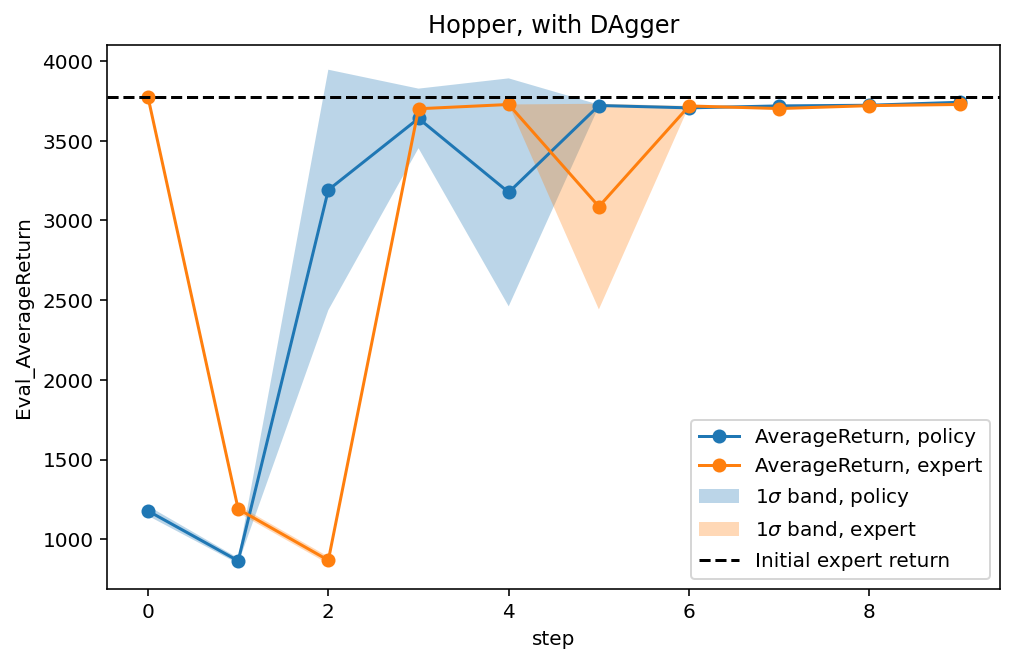

In [59]:
plot_dagger_performance('Hopper', 'q2_bc_hopper_Hopper-v4_03-09-2022_21-26-21')